# Testing on cgrgraph

In [ ]:
!pip install csrgraph

  Created wheel for csrgraph: filename=csrgraph-0.1.28-py3-none-any.whl size=17632 sha256=40c530cda81deae9d7f64c4df74fcdb39f4d98388a7e5c5729a35256202d5534
  Stored in directory: /root/.cache/pip/wheels/3d/0a/58/36a63805f1cd719cbcc5a3c4c109604985a809e7d81bac1649
Successfully built csrgraph


In [ ]:
import csrgraph as cg
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
col1, col2 = list(('a')*5 + ('b')*5), list(('c')*3 + ('d') + ('b') + ('a')*2 + ('d')*3 )

In [ ]:
df = pd.DataFrame([col1, col2], ).T.rename(columns={0:'node1',1:'node2'})

In [ ]:
df

,node1,node2
0,a,c
1,a,c
2,a,c
3,a,d
4,a,b
5,b,a
6,b,a
7,b,d
8,b,d
9,b,d


In [ ]:
G = nx.from_pandas_edgelist(df, 'node1', 'node2')

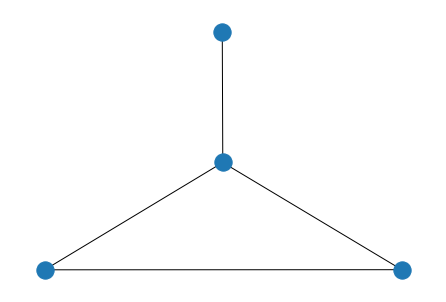

In [ ]:
nx.draw(G)

In [ ]:
G.nodes

NodeView(('a', 'c', 'd', 'b'))

In [ ]:
min(nx.connected_components(G),key=len)

{'a', 'b', 'c', 'd'}

In [ ]:
Gx = cg.csrgraph(G, threads=0) 
node_names = Gx.names

In [ ]:
drug_nodes = df['node1'].to_list()

drug_nodes_indices = []
for i in drug_nodes:
  for idx, node in enumerate(node_names):
    if i == node:
      drug_nodes_indices.append(idx)

In [ ]:
walks = Gx.random_walks(walklen=6, # length of the walks
                epochs=5, # how many times to start a walk from each node
                start_nodes=list(set(drug_nodes_indices)), # the starting node as index not node name. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
                return_weight=50, # return to previous node ?
                neighbor_weight=5000)

In [ ]:
walks = np.vectorize(lambda x: node_names[x])(walks) # map to original node names

In [ ]:
walks

array([['a', 'c', 'a', 'c', 'a', 'c'],
       ['b', 'a', 'd', 'b', 'a', 'd'],
       ['a', 'b', 'd', 'a', 'b', 'd'],
       ['b', 'a', 'd', 'b', 'a', 'd'],
       ['a', 'd', 'b', 'a', 'd', 'b'],
       ['b', 'a', 'd', 'b', 'a', 'd'],
       ['a', 'b', 'd', 'a', 'b', 'd'],
       ['b', 'd', 'a', 'b', 'd', 'a'],
       ['a', 'd', 'b', 'a', 'd', 'b'],
       ['b', 'd', 'b', 'a', 'd', 'b']], dtype='<U1')

In [ ]:
dd = Gx.random_walk_resample()